In [9]:
#Liberia para gestionar fechas
library(lubridate)
#libreria para manejar bases de datos
library(dplyr)
#libreria para ajustar distribuciones
library(MASS)

In [10]:
estacion=read.csv('D:/Proyectos_GitHub/curso_hidrologia/data/Estaciones/estacion9.csv')

El operador %>% sirve para concatenar varias funciones y ahorrarnos lineas de comandos.
Queremos calcular el maximo diario ocurrido en cada año de registro

In [11]:
max_anual=estacion%>%
  mutate(fecha = as.Date(fecha, format="%m/%d/%Y"))%>% 
  mutate(mes = month(fecha),ano=year(fecha))%>%
  group_by(ano) %>%
  summarise(precip= max(pp,na.rm=T))

In [13]:
head(max_anual)

ano,precip
1964,23.0
1965,31.4
1966,38.0
1967,42.1
1968,24.6
1969,25.1


Ajuste de la distribucion normal en los datos

In [16]:
my_data=max_anual$precip
fit <- fitdistr(my_data,densfun = 'normal')
fit

      mean          sd    
  33.0250000    7.5702575 
 ( 1.0498058) ( 0.7423248)

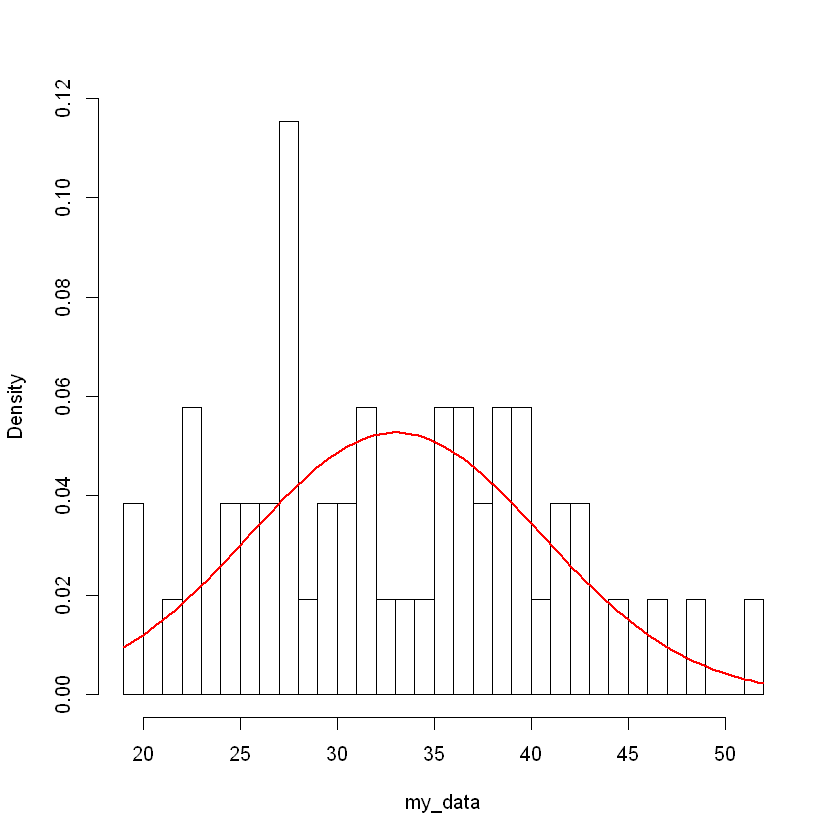

In [17]:
hist(my_data, pch=20, breaks=25, prob=TRUE, main="")
curve(dnorm(x, fit$estimate[1], fit$estimate[2]), col="red", lwd=2, add=T)

# Usando la liberia fitdistrplus 

In [21]:
library(fitdistrplus)

Loading required package: survival


Probando las distribuciones weibull, gamma y lognormal

In [24]:
fit_w  <- fitdist(my_data, "weibull")
fit_g  <- fitdist(my_data, "gamma")
fit_ln <- fitdist(my_data, "lnorm")
summary(fit_ln)

$start.arg
$start.arg$shape
[1] 5.087535

$start.arg$scale
[1] 35.97698


$fix.arg
NULL

$start.arg
$start.arg$shape
[1] 19.03112

$start.arg$rate
[1] 0.576264


$fix.arg
NULL

$start.arg
$start.arg$meanlog
[1] 3.470448

$start.arg$sdlog
[1] 0.2335916


$fix.arg
NULL



Fitting of the distribution ' lnorm ' by maximum likelihood 
Parameters : 
         estimate Std. Error
meanlog 3.4704476 0.03239333
sdlog   0.2335916 0.02290365
Loglikelihood:  -178.6307   AIC:  361.2613   BIC:  365.1638 
Correlation matrix:
        meanlog sdlog
meanlog       1     0
sdlog         0     1


Graficando los resultados

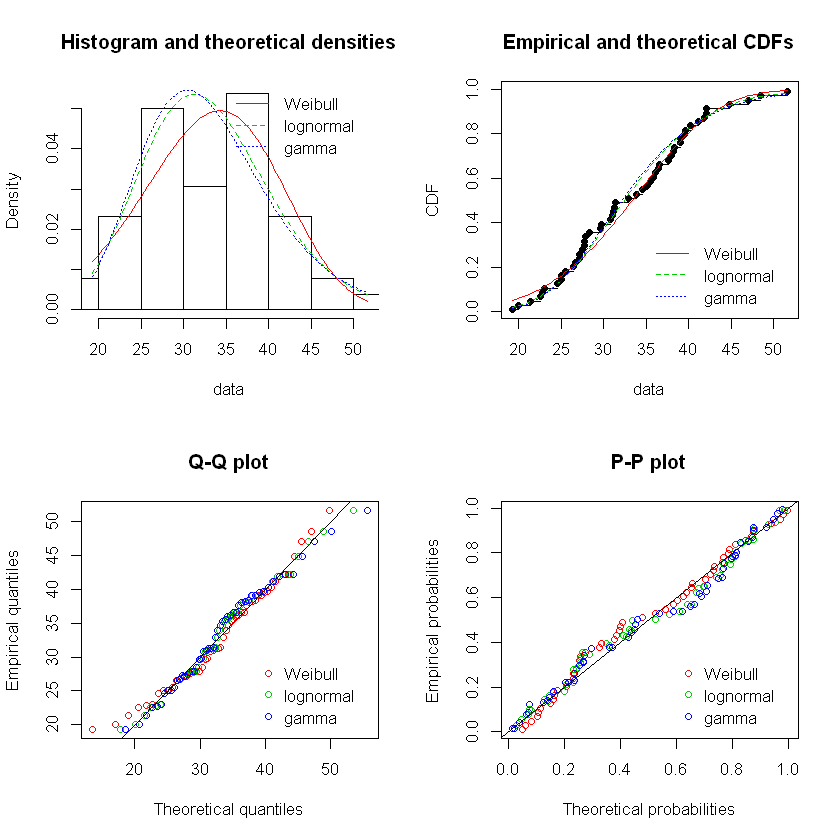

In [25]:
par(mfrow=c(2,2))
plot.legend <- c("Weibull", "lognormal", "gamma")
denscomp(list(fit_w, fit_g, fit_ln), legendtext = plot.legend)
cdfcomp (list(fit_w, fit_g, fit_ln), legendtext = plot.legend)
qqcomp  (list(fit_w, fit_g, fit_ln), legendtext = plot.legend)
ppcomp  (list(fit_w, fit_g, fit_ln), legendtext = plot.legend)

El paquete también proporciona algunas estadísticas interesantes:

In [27]:
gofstat(list(fit_w, fit_g, fit_ln), fitnames = c("Weibull", "lognormal", "gamma"))

Goodness-of-fit statistics
                                Weibull  lognormal      gamma
Kolmogorov-Smirnov statistic 0.09453402 0.08296080 0.09324416
Cramer-von Mises statistic   0.06175074 0.06636964 0.07316471
Anderson-Darling statistic   0.41448822 0.34705130 0.39052484

Goodness-of-fit criteria
                                Weibull lognormal    gamma
Akaike's Information Criterion 363.5471  360.8297 361.2613
Bayesian Information Criterion 367.4496  364.7321 365.1638